In [15]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [16]:
df_rent7 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2207.csv")
df_rent8 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_22081.csv")
df_rent9 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2209.csv")
df_rent10 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2210.csv")
df_rent11 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2211.csv")
df_rent12 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2212.csv")

In [17]:
df_rent = pd.concat([df_rent7, df_rent8, df_rent9, df_rent10, df_rent11, df_rent12])

In [18]:
df = pd.read_csv("training_data7~12.csv")

## 새싹따릉이와 고장의 연관성분석

7월부터 12월까지 대여이력에서 자전거번호를 unique하여 실제로 운행되는 자전거번호들 중 따릉이의 비율

In [19]:
bike_num = len(df_rent['자전거번호'].unique())

df_sprout = df_rent[df_rent['자전거번호'] >= "SPB-80000"]['자전거번호'].unique()
sprout_num = len(df_sprout)
sprout_pro = sprout_num / bike_num
print("7~12월 새싹따릉이 운용 비율 :", sprout_pro)

7~12월 새싹따릉이 운용 비율 : 0.1145022210608832


In [20]:
bike_num2 = len(df['자전거번호'].unique())

df_sprout2 = df[(df['자전거번호'] >= "SPB-80000")]
sprout_num2 = len(df_sprout2['자전거번호'].unique())
sprout_pro2 = sprout_num2 / bike_num2
print("traning_data에서의 새싹따릉이 비율 :", sprout_pro2)

traning_data에서의 새싹따릉이 비율 : 0.02598460171750074


In [21]:
df_broken = df[df['고장'] == 1]['자전거번호'].unique()
df_normal = df[df['고장'] == 0]['자전거번호'].unique()

df_sprout_broken = df[(df['자전거번호'] >= "SPB-80000") & (df['고장'] == 1)]['자전거번호'].unique()
df_sprout_normal = df[(df['자전거번호'] >= "SPB-80000") & (df['고장'] == 0)]['자전거번호'].unique()

# print(len(df_broken),len(df_normal), len(df_sprout_broken), len(df_sprout_normal))
print("고장직전 대여이력 자전거 중 새싹따릉이 비율 :", len(df_sprout_broken) / len(df_broken))
print("고장직후 대여이력 자전거 중 새싹따릉이 비율 :", len(df_sprout_normal) / len(df_normal))

고장직전 대여이력 자전거 중 새싹따릉이 비율 : 0.020437432771602725
고장직후 대여이력 자전거 중 새싹따릉이 비율 : 0.03188573077477998


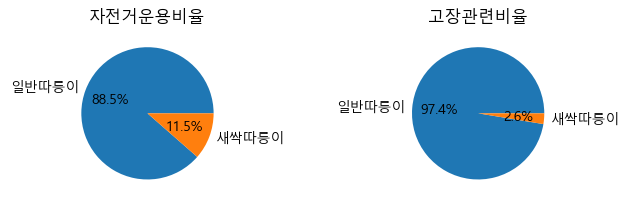

In [23]:
labels = ['일반따릉이', '새싹따릉이']

fig, axs = plt.subplots(1, 2)

axs[0].pie([1 - sprout_pro, sprout_pro], labels=labels, autopct='%1.1f%%')
axs[0].set_aspect('equal')
axs[0].set_title('자전거운용비율')

axs[1].pie([1 - sprout_pro2, sprout_pro2], labels=labels, autopct='%1.1f%%')
axs[1].set_aspect('equal')
axs[1].set_title('고장관련비율')

plt.subplots_adjust(wspace=1)

plt.show()

왼쪽 표는 7-12월 대여이력에서 자전거번호를 `unique()`하고 일반따릉이와 새삭따릉이의 비율을 나타낸 표입니다. 즉, 7-12월까지 운용된 자전거들 중 새삭따릉이의 비율은 11.5%입니다.

오른쪽 표는 저희가 뽑아낸 고장 전,후 대여이력에서 자전거번호를 `unique()`하고 일반따릉이와 새삭따릉이의 비율을 나타낸 표입니다. 운용비율에 비해 고장비율은 눈에띄게 낮다는 사실을 알 수 있습니다.

<br>

## 결론 및 해석

**결론적으로, 새싹따릉이는 다른 자전거보다 고장비율이 적습니다.**

해석해보자면, 새싹따릉이들은 2020년 11월 30부터 배치되기 시작하여 다른 따릉이들에 비해 최근에 배치가 시작된 것들이 많다고 합니다.

따릉이가 배치된 기간이 길수록 고장날 확률이 높다는 가설을 세워 볼 수 있겠습니다.